# Raw GPS Taxi Data Explorer
## taxi_record_{07,08,09}_50drivers.pkl

This notebook explores the three raw GPS trajectory datasets:
- `taxi_record_07_50drivers.pkl` - July 2016
- `taxi_record_08_50drivers.pkl` - August 2016
- `taxi_record_09_50drivers.pkl` - September 2016

The purpose is to document temporal characteristics, data structure, and key statistics for future processing tasks.

In [2]:
import pickle
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

## Load All Three Datasets

In [3]:
# Load the three monthly datasets
datasets = {}
dataset_paths = {
    'July 2016': '../datasets/raw_gps_data/taxi_record_07_50drivers.pkl',
    'August 2016': '../datasets/raw_gps_data/taxi_record_08_50drivers.pkl',
    'September 2016': '../datasets/raw_gps_data/taxi_record_09_50drivers.pkl'
}

for month_name, path in dataset_paths.items():
    print(f"Loading {month_name}...")
    with open(path, 'rb') as f:
        datasets[month_name] = pickle.load(f)
    print(f"  ✓ Loaded {len(datasets[month_name])} drivers")

print("\nAll datasets loaded successfully!")

Loading July 2016...
  ✓ Loaded 50 drivers
Loading August 2016...
  ✓ Loaded 50 drivers
Loading September 2016...
  ✓ Loaded 50 drivers

All datasets loaded successfully!


## 1. Data Structure Verification
### Verify that all three datasets have the same structure

In [4]:
# Check number of drivers in each dataset
print("Number of drivers per dataset:")
for month_name, data in datasets.items():
    print(f"  {month_name}: {len(data)} drivers")

# Check if driver keys are consistent
driver_keys_sets = [set(data.keys()) for data in datasets.values()]
all_same_drivers = all(keys == driver_keys_sets[0] for keys in driver_keys_sets)
print(f"\nSame driver keys across all datasets: {all_same_drivers}")

if all_same_drivers:
    print(f"  Total unique drivers: {len(driver_keys_sets[0])}")
else:
    print("  Driver keys differ across datasets")
    for i, month_name in enumerate(datasets.keys()):
        print(f"    {month_name}: {len(driver_keys_sets[i])} drivers")

Number of drivers per dataset:
  July 2016: 50 drivers
  August 2016: 50 drivers
  September 2016: 50 drivers

Same driver keys across all datasets: True
  Total unique drivers: 50


In [5]:
# Examine data structure for first driver in first dataset
month_name = list(datasets.keys())[0]
data = datasets[month_name]
driver_keys = list(data.keys())
first_driver = driver_keys[0]

print(f"Examining structure for driver: {first_driver}")
print(f"Data type: {type(data[first_driver])}")
print(f"Number of records: {len(data[first_driver])}")
print(f"\nFirst 3 records:")
for i in range(min(3, len(data[first_driver]))):
    record = data[first_driver][i]
    print(f"  Record {i}: {record}")
    print(f"    Type: {type(record)}")
    print(f"    Length: {len(record)}")

Examining structure for driver: 粤SW794X
Data type: <class 'list'>
Number of records: 21

First 3 records:
  Record 0: [['Ã§Â²Â¤SW794X', 22.82855, 114.161819, 3, 0, '2016-07-01 00:00:03'], ['Ã§Â²Â¤SW794X', 22.82935, 114.160568, 18, 0, '2016-07-01 00:00:18'], ['Ã§Â²Â¤SW794X', 22.8302, 114.159264, 33, 0, '2016-07-01 00:00:33'], ['Ã§Â²Â¤SW794X', 22.831083, 114.158012, 48, 0, '2016-07-01 00:00:48'], ['Ã§Â²Â¤SW794X', 22.831717, 114.157898, 63, 0, '2016-07-01 00:01:03'], ['Ã§Â²Â¤SW794X', 22.831734, 114.157898, 78, 0, '2016-07-01 00:01:18'], ['Ã§Â²Â¤SW794X', 22.831734, 114.157898, 93, 0, '2016-07-01 00:01:33'], ['Ã§Â²Â¤SW794X', 22.831751, 114.157867, 108, 0, '2016-07-01 00:01:48'], ['Ã§Â²Â¤SW794X', 22.845383, 114.156349, 498, 0, '2016-07-01 00:08:18'], ['Ã§Â²Â¤SW794X', 22.845383, 114.156364, 528, 0, '2016-07-01 00:08:48'], ['Ã§Â²Â¤SW794X', 22.845383, 114.156364, 543, 0, '2016-07-01 00:09:03'], ['Ã§Â²Â¤SW794X', 22.845383, 114.156364, 558, 0, '2016-07-01 00:09:18'], ['Ã§Â²Â¤SW794X', 22.845383, 1

In [6]:
# Verify record structure across all datasets
print("Record structure verification:")
print("Expected fields: [plate_id, latitude, longitude, seconds, passenger_indicator, timestamp]")
print()

for month_name, data in datasets.items():
    driver_keys = list(data.keys())
    if len(driver_keys) > 0 and len(data[driver_keys[0]]) > 0:
        sample_record = data[driver_keys[0]][0]
        print(f"{month_name}:")
        print(f"  Record length: {len(sample_record)}")
        print(f"  Field types: {[type(field).__name__ for field in sample_record]}")
        print(f"  Sample record: {sample_record}")
        print()

Record structure verification:
Expected fields: [plate_id, latitude, longitude, seconds, passenger_indicator, timestamp]

July 2016:
  Record length: 1349
  Field types: ['list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list

## 2. General Dataset Statistics
### Common statistics across all three datasets

In [14]:
def analyze_dataset_general_stats(data, month_name):
    """Extract general statistics from a dataset"""
    
    stats = {
        'month': month_name,
        'num_drivers': len(data),
        'total_records': 0,
        'records_per_driver': [],
        'unique_plates': set(),
        'lat_range': [float('inf'), float('-inf')],
        'lon_range': [float('inf'), float('-inf')],
        'passenger_on_count': 0,
        'passenger_off_count': 0
    }
    
    for driver_key, trajectories in data.items():
        driver_record_count = 0
        
        # Each driver has a list of trajectories
        for trajectory in trajectories:
            driver_record_count += len(trajectory)
            
            # Each trajectory is a list of GPS records
            for record in trajectory:
                # Handle variable record lengths
                if len(record) < 6:
                    print(f"Warning: Record has only {len(record)} elements: {record}")
                    continue
                
                # Access by index directly - data is: [plate_id, lat, lon, seconds, passenger, timestamp]
                plate_id = record[0]
                lat = record[1]
                lon = record[2]
                seconds = record[3]
                passenger = record[4]
                timestamp = record[5]
                
                # Convert types as needed
                if isinstance(plate_id, bytes):
                    plate_id = plate_id.decode('utf-8', errors='ignore')
                plate_id = str(plate_id)
                
                lat = float(lat)
                lon = float(lon)
                seconds = int(seconds)
                passenger = int(passenger)
                timestamp = str(timestamp)
                
                stats['unique_plates'].add(plate_id)
                stats['lat_range'][0] = min(stats['lat_range'][0], lat)
                stats['lat_range'][1] = max(stats['lat_range'][1], lat)
                stats['lon_range'][0] = min(stats['lon_range'][0], lon)
                stats['lon_range'][1] = max(stats['lon_range'][1], lon)
                
                if passenger == 1:
                    stats['passenger_on_count'] += 1
                else:
                    stats['passenger_off_count'] += 1
        
        stats['records_per_driver'].append(driver_record_count)
        stats['total_records'] += driver_record_count
    
    stats['unique_plates'] = len(stats['unique_plates'])
    stats['avg_records_per_driver'] = np.mean(stats['records_per_driver'])
    stats['std_records_per_driver'] = np.std(stats['records_per_driver'])
    stats['min_records_per_driver'] = np.min(stats['records_per_driver'])
    stats['max_records_per_driver'] = np.max(stats['records_per_driver'])
    
    return stats

# Analyze all datasets
general_stats = {}
for month_name, data in datasets.items():
    print(f"Analyzing {month_name}...")
    general_stats[month_name] = analyze_dataset_general_stats(data, month_name)
    
print("\nGeneral statistics computed!")

Analyzing July 2016...
Analyzing August 2016...
Analyzing September 2016...

General statistics computed!


In [15]:
# Display general statistics
print("=" * 80)
print("GENERAL DATASET STATISTICS")
print("=" * 80)

for month_name, stats in general_stats.items():
    print(f"\n{month_name}:")
    print(f"  Number of drivers: {stats['num_drivers']}")
    print(f"  Unique plate IDs: {stats['unique_plates']}")
    print(f"  Total GPS records: {stats['total_records']:,}")
    print(f"  Records per driver:")
    print(f"    Mean: {stats['avg_records_per_driver']:.1f}")
    print(f"    Std Dev: {stats['std_records_per_driver']:.1f}")
    print(f"    Min: {stats['min_records_per_driver']}")
    print(f"    Max: {stats['max_records_per_driver']}")
    print(f"  Latitude range: [{stats['lat_range'][0]:.6f}, {stats['lat_range'][1]:.6f}]")
    print(f"  Longitude range: [{stats['lon_range'][0]:.6f}, {stats['lon_range'][1]:.6f}]")
    print(f"  Passenger indicator:")
    print(f"    On (1): {stats['passenger_on_count']:,} ({stats['passenger_on_count']/stats['total_records']*100:.1f}%)")
    print(f"    Off (0): {stats['passenger_off_count']:,} ({stats['passenger_off_count']/stats['total_records']*100:.1f}%)")

GENERAL DATASET STATISTICS

July 2016:
  Number of drivers: 50
  Unique plate IDs: 50
  Total GPS records: 2,695,153
  Records per driver:
    Mean: 53903.1
    Std Dev: 26300.6
    Min: 4757
    Max: 128570
  Latitude range: [22.444304, 22.869999]
  Longitude range: [113.750099, 114.535934]
  Passenger indicator:
    On (1): 1,074,402 (39.9%)
    Off (0): 1,620,751 (60.1%)

August 2016:
  Number of drivers: 50
  Unique plate IDs: 50
  Total GPS records: 2,952,403
  Records per driver:
    Mean: 59048.1
    Std Dev: 27348.5
    Min: 18288
    Max: 119227
  Latitude range: [22.454800, 22.869949]
  Longitude range: [113.750221, 114.558197]
  Passenger indicator:
    On (1): 1,105,304 (37.4%)
    Off (0): 1,847,099 (62.6%)

September 2016:
  Number of drivers: 50
  Unique plate IDs: 50
  Total GPS records: 2,476,205
  Records per driver:
    Mean: 49524.1
    Std Dev: 27539.3
    Min: 11198
    Max: 151625
  Latitude range: [22.442450, 22.869999]
  Longitude range: [113.750191, 114.552597

## 3. Temporal Analysis
### Detailed time-based analysis for each dataset

In [16]:
def analyze_temporal_characteristics(data, month_name):
    """Analyze temporal characteristics of the dataset"""
    
    timestamps = []
    dates = []
    seconds_of_day = []
    
    for driver_key, trajectories in data.items():
        # Each driver has a list of trajectories
        for trajectory in trajectories:
            # Each trajectory is a list of GPS records
            for record in trajectory:
                # Access by index - data is: [plate_id, lat, lon, seconds, passenger, timestamp]
                seconds = int(record[3])
                timestamp_str = str(record[5])
                
                # Parse timestamp
                dt = datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
                timestamps.append(dt)
                dates.append(dt.date())
                seconds_of_day.append(seconds)
    
    # Convert to pandas for easier analysis
    df = pd.DataFrame({
        'timestamp': timestamps,
        'date': dates,
        'seconds': seconds_of_day
    })
    
    df['day_of_week'] = df['timestamp'].dt.dayofweek  # Monday=0, Sunday=6
    df['day_name'] = df['timestamp'].dt.day_name()
    df['hour'] = df['timestamp'].dt.hour
    df['week'] = df['timestamp'].dt.isocalendar().week
    
    temporal_stats = {
        'month': month_name,
        'date_range': (df['date'].min(), df['date'].max()),
        'total_days': (df['date'].max() - df['date'].min()).days + 1,
        'unique_dates': df['date'].nunique(),
        'dates_present': sorted(df['date'].unique()),
        'day_of_week_counts': df['day_name'].value_counts().to_dict(),
        'unique_weeks': df['week'].nunique(),
        'weeks_present': sorted(df['week'].unique()),
        'records_by_day_of_week': df.groupby('day_name').size().to_dict(),
        'records_by_hour': df.groupby('hour').size().to_dict(),
        'records_by_date': df.groupby('date').size().to_dict(),
        'seconds_range': (df['seconds'].min(), df['seconds'].max()),
        'dataframe': df
    }
    
    return temporal_stats

# Analyze temporal characteristics for all datasets
temporal_stats = {}
for month_name, data in datasets.items():
    print(f"Analyzing temporal characteristics for {month_name}...")
    temporal_stats[month_name] = analyze_temporal_characteristics(data, month_name)
    
print("\nTemporal analysis complete!")

Analyzing temporal characteristics for July 2016...
Analyzing temporal characteristics for August 2016...
Analyzing temporal characteristics for September 2016...

Temporal analysis complete!


In [17]:
# Display temporal statistics
print("=" * 80)
print("TEMPORAL CHARACTERISTICS")
print("=" * 80)

for month_name, stats in temporal_stats.items():
    print(f"\n{month_name}:")
    print(f"  Date range: {stats['date_range'][0]} to {stats['date_range'][1]}")
    print(f"  Total span: {stats['total_days']} days")
    print(f"  Unique dates with data: {stats['unique_dates']}")
    print(f"  Unique weeks: {stats['unique_weeks']}")
    print(f"  Week numbers present: {stats['weeks_present']}")
    print(f"  Seconds range: {stats['seconds_range'][0]} to {stats['seconds_range'][1]}")
    print(f"    (Time range: {stats['seconds_range'][0]//3600:02d}:{(stats['seconds_range'][0]%3600)//60:02d}:{stats['seconds_range'][0]%60:02d} to "
          f"{stats['seconds_range'][1]//3600:02d}:{(stats['seconds_range'][1]%3600)//60:02d}:{stats['seconds_range'][1]%60:02d})")
    
    print(f"\n  Day of week distribution:")
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    for day in day_order:
        count = stats['day_of_week_counts'].get(day, 0)
        if count > 0:
            print(f"    {day}: {count:,} records")

TEMPORAL CHARACTERISTICS

July 2016:
  Date range: 2016-07-01 to 2016-07-29
  Total span: 29 days
  Unique dates with data: 21
  Unique weeks: 5
  Week numbers present: [np.uint32(26), np.uint32(27), np.uint32(28), np.uint32(29), np.uint32(30)]
  Seconds range: 0 to 86399
    (Time range: 00:00:00 to 23:59:59)

  Day of week distribution:
    Monday: 485,264 records
    Tuesday: 461,643 records
    Wednesday: 521,816 records
    Thursday: 542,906 records
    Friday: 683,524 records

August 2016:
  Date range: 2016-08-01 to 2016-08-31
  Total span: 31 days
  Unique dates with data: 23
  Unique weeks: 5
  Week numbers present: [np.uint32(31), np.uint32(32), np.uint32(33), np.uint32(34), np.uint32(35)]
  Seconds range: 0 to 86399
    (Time range: 00:00:00 to 23:59:59)

  Day of week distribution:
    Monday: 615,703 records
    Tuesday: 637,187 records
    Wednesday: 648,214 records
    Thursday: 538,960 records
    Friday: 512,339 records

September 2016:
  Date range: 2016-09-01 to 2016

In [18]:
# Show dates present for each dataset
print("=" * 80)
print("DATES PRESENT IN EACH DATASET")
print("=" * 80)

for month_name, stats in temporal_stats.items():
    print(f"\n{month_name}: {len(stats['dates_present'])} unique dates")
    # Group by week
    dates_df = pd.DataFrame({'date': stats['dates_present']})
    dates_df['week'] = pd.to_datetime(dates_df['date']).dt.isocalendar().week
    dates_df['day_name'] = pd.to_datetime(dates_df['date']).dt.day_name()
    
    for week in sorted(dates_df['week'].unique()):
        week_dates = dates_df[dates_df['week'] == week]
        print(f"  Week {week}:")
        for _, row in week_dates.iterrows():
            print(f"    {row['date']} ({row['day_name']})")

DATES PRESENT IN EACH DATASET

July 2016: 21 unique dates
  Week 26:
    2016-07-01 (Friday)
  Week 27:
    2016-07-04 (Monday)
    2016-07-05 (Tuesday)
    2016-07-06 (Wednesday)
    2016-07-07 (Thursday)
    2016-07-08 (Friday)
  Week 28:
    2016-07-11 (Monday)
    2016-07-12 (Tuesday)
    2016-07-13 (Wednesday)
    2016-07-14 (Thursday)
    2016-07-15 (Friday)
  Week 29:
    2016-07-18 (Monday)
    2016-07-19 (Tuesday)
    2016-07-20 (Wednesday)
    2016-07-21 (Thursday)
    2016-07-22 (Friday)
  Week 30:
    2016-07-25 (Monday)
    2016-07-26 (Tuesday)
    2016-07-27 (Wednesday)
    2016-07-28 (Thursday)
    2016-07-29 (Friday)

August 2016: 23 unique dates
  Week 31:
    2016-08-01 (Monday)
    2016-08-02 (Tuesday)
    2016-08-03 (Wednesday)
    2016-08-04 (Thursday)
    2016-08-05 (Friday)
  Week 32:
    2016-08-08 (Monday)
    2016-08-09 (Tuesday)
    2016-08-10 (Wednesday)
    2016-08-11 (Thursday)
    2016-08-12 (Friday)
  Week 33:
    2016-08-15 (Monday)
    2016-08-16 (Tues

## 4. Records by Date Analysis
### Understand data density across dates

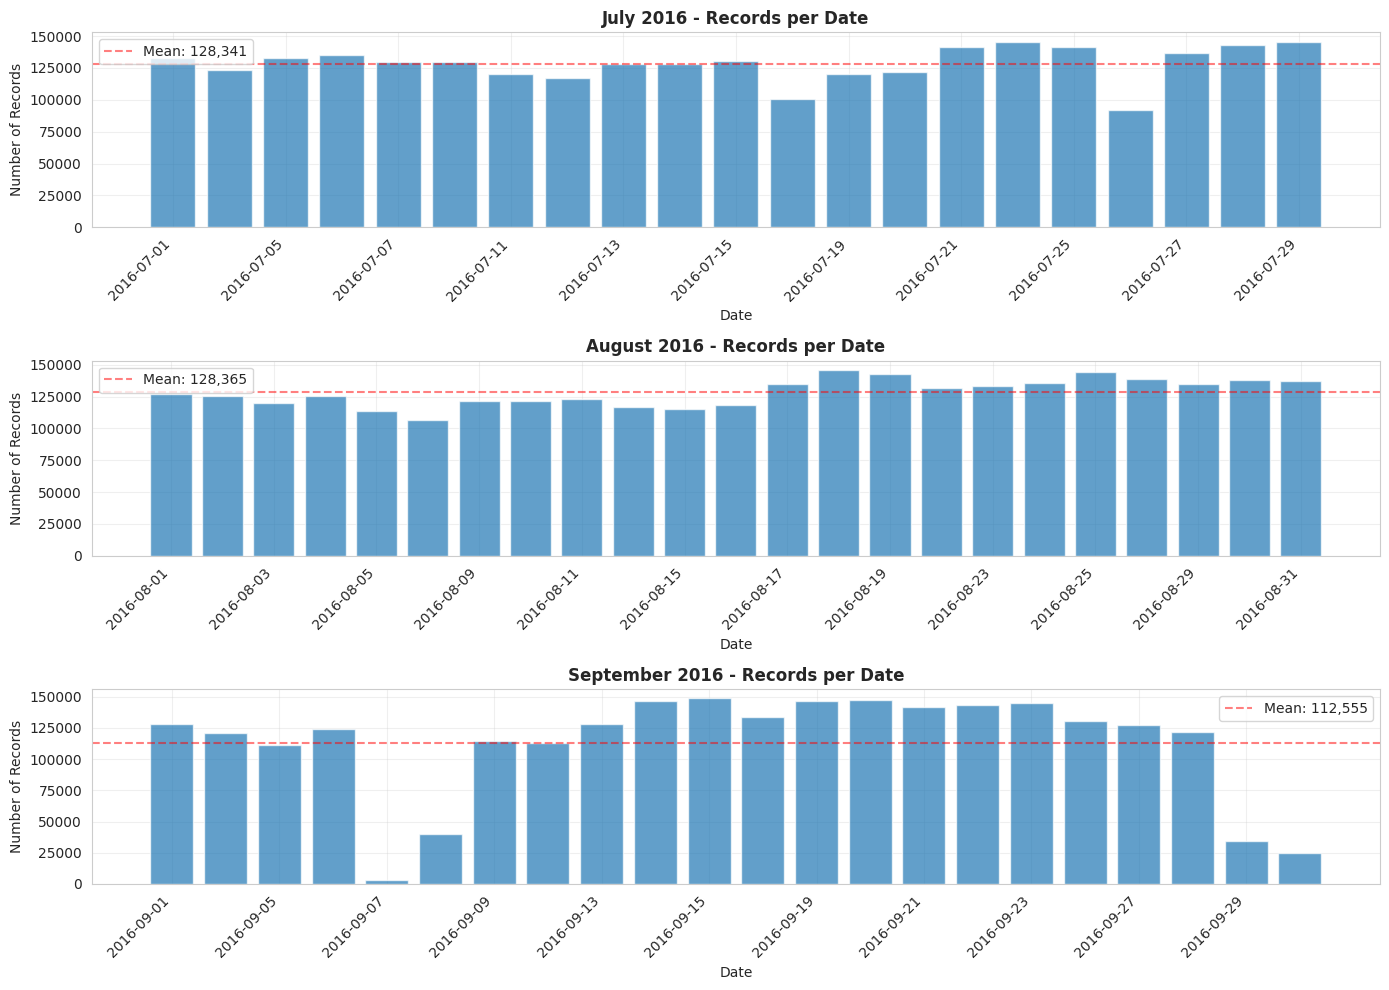

In [19]:
# Plot records per date for each dataset
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

for idx, (month_name, stats) in enumerate(temporal_stats.items()):
    ax = axes[idx]
    
    records_by_date = stats['records_by_date']
    dates = sorted(records_by_date.keys())
    counts = [records_by_date[d] for d in dates]
    
    ax.bar(range(len(dates)), counts, alpha=0.7)
    ax.set_title(f'{month_name} - Records per Date', fontsize=12, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Records')
    ax.grid(True, alpha=0.3)
    
    # Set x-axis labels (show every few dates to avoid clutter)
    tick_positions = range(0, len(dates), max(1, len(dates)//10))
    ax.set_xticks(tick_positions)
    ax.set_xticklabels([str(dates[i]) for i in tick_positions], rotation=45, ha='right')
    
    # Add statistics
    mean_records = np.mean(counts)
    ax.axhline(mean_records, color='red', linestyle='--', alpha=0.5, label=f'Mean: {mean_records:,.0f}')
    ax.legend()

plt.tight_layout()
plt.show()

## 5. Hourly Distribution Analysis

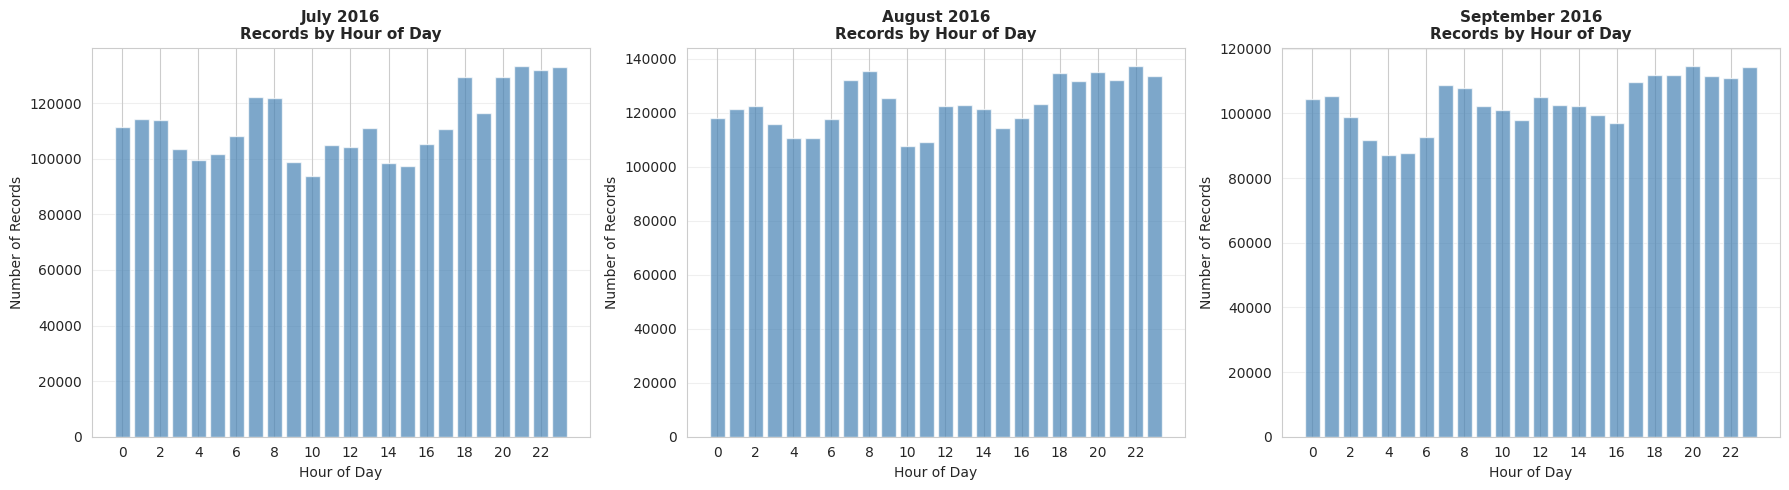

In [20]:
# Plot hourly distribution for each dataset
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (month_name, stats) in enumerate(temporal_stats.items()):
    ax = axes[idx]
    
    records_by_hour = stats['records_by_hour']
    hours = sorted(records_by_hour.keys())
    counts = [records_by_hour[h] for h in hours]
    
    ax.bar(hours, counts, alpha=0.7, color='steelblue')
    ax.set_title(f'{month_name}\nRecords by Hour of Day', fontsize=11, fontweight='bold')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Number of Records')
    ax.set_xticks(range(0, 24, 2))
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 6. Day of Week Distribution

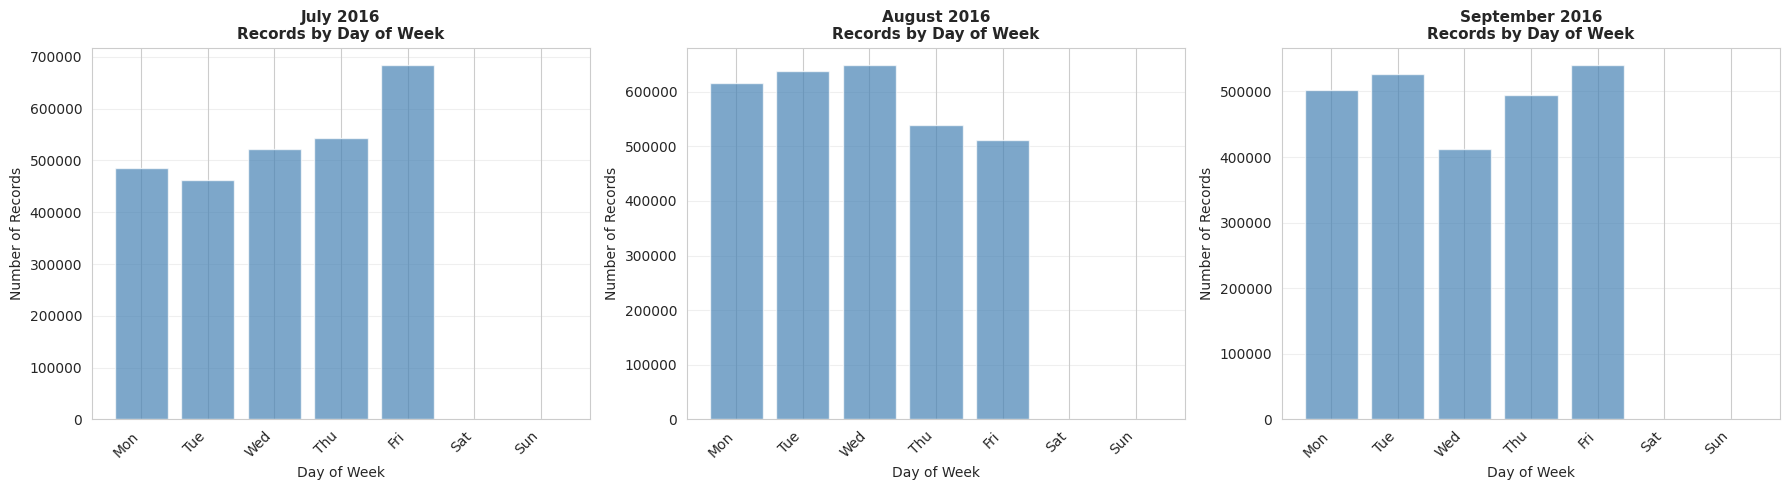

Sunday data presence:
  July 2016: 0 records (Absent)
  August 2016: 0 records (Absent)
  September 2016: 0 records (Absent)


In [21]:
# Plot day of week distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for idx, (month_name, stats) in enumerate(temporal_stats.items()):
    ax = axes[idx]
    
    dow_counts = stats['day_of_week_counts']
    counts = [dow_counts.get(day, 0) for day in day_order]
    
    colors = ['steelblue' if day != 'Sunday' else 'coral' for day in day_order]
    ax.bar(range(len(day_order)), counts, alpha=0.7, color=colors)
    ax.set_title(f'{month_name}\nRecords by Day of Week', fontsize=11, fontweight='bold')
    ax.set_xlabel('Day of Week')
    ax.set_ylabel('Number of Records')
    ax.set_xticks(range(len(day_order)))
    ax.set_xticklabels([d[:3] for d in day_order], rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Check if Sunday data is present
print("Sunday data presence:")
for month_name, stats in temporal_stats.items():
    sunday_count = stats['day_of_week_counts'].get('Sunday', 0)
    print(f"  {month_name}: {sunday_count:,} records ({sunday_count > 0 and 'Present' or 'Absent'})")

## 7. Time Bucket Analysis
### Analyze 5-minute time bucket distribution (288 buckets per day)

In [22]:
# Calculate time buckets (5-minute intervals, 288 per day)
print("Time bucket analysis (5-minute intervals):")
print("Total possible buckets per day: 288 (24 hours × 12 five-minute intervals)\n")

for month_name, stats in temporal_stats.items():
    df = stats['dataframe']
    df['time_bucket'] = df['seconds'] // 300  # 5 minutes = 300 seconds
    
    unique_buckets = df['time_bucket'].nunique()
    bucket_counts = df['time_bucket'].value_counts().sort_index()
    
    print(f"{month_name}:")
    print(f"  Unique time buckets used: {unique_buckets} / 288")
    print(f"  Time bucket range: {df['time_bucket'].min()} to {df['time_bucket'].max()}")
    print(f"  Mean records per bucket: {bucket_counts.mean():.1f}")
    print(f"  Std dev: {bucket_counts.std():.1f}")
    print()

Time bucket analysis (5-minute intervals):
Total possible buckets per day: 288 (24 hours × 12 five-minute intervals)

July 2016:
  Unique time buckets used: 288 / 288
  Time bucket range: 0 to 287
  Mean records per bucket: 9358.2
  Std dev: 1558.5

August 2016:
  Unique time buckets used: 288 / 288
  Time bucket range: 0 to 287
  Mean records per bucket: 10251.4
  Std dev: 1603.1

September 2016:
  Unique time buckets used: 288 / 288
  Time bucket range: 0 to 287
  Mean records per bucket: 8597.9
  Std dev: 1365.8



## 8. Pickup/Dropoff Event Detection
### Count transitions in passenger_indicator

In [23]:
def count_pickup_dropoff_events(data, month_name):
    """Count pickup and dropoff events based on passenger_indicator transitions"""
    
    pickup_count = 0
    dropoff_count = 0
    
    for driver_key, trajectories in data.items():
        # Each driver has a list of trajectories
        for trajectory in trajectories:
            # Each trajectory is a list of GPS records
            for i in range(1, len(trajectory)):
                prev_passenger = trajectory[i-1][4]
                curr_passenger = trajectory[i][4]
                
                # Pickup: 0 -> 1
                if prev_passenger == 0 and curr_passenger == 1:
                    pickup_count += 1
                # Dropoff: 1 -> 0
                elif prev_passenger == 1 and curr_passenger == 0:
                    dropoff_count += 1
    
    return {
        'month': month_name,
        'pickups': pickup_count,
        'dropoffs': dropoff_count
    }

# Count events for all datasets
print("=" * 80)
print("PICKUP/DROPOFF EVENT COUNTS")
print("=" * 80)

event_stats = {}
for month_name, data in datasets.items():
    print(f"\nAnalyzing {month_name}...")
    event_stats[month_name] = count_pickup_dropoff_events(data, month_name)
    
    stats = event_stats[month_name]
    print(f"  Pickup events (0→1): {stats['pickups']:,}")
    print(f"  Dropoff events (1→0): {stats['dropoffs']:,}")
    print(f"  Difference: {abs(stats['pickups'] - stats['dropoffs']):,}")
    print(f"  Balance: {stats['pickups'] / stats['dropoffs']:.3f}" if stats['dropoffs'] > 0 else "  Balance: N/A")

PICKUP/DROPOFF EVENT COUNTS

Analyzing July 2016...
  Pickup events (0→1): 128,133
  Dropoff events (1→0): 128,085
  Difference: 48
  Balance: 1.000

Analyzing August 2016...
  Pickup events (0→1): 116,829
  Dropoff events (1→0): 116,808
  Difference: 21
  Balance: 1.000

Analyzing September 2016...
  Pickup events (0→1): 80,734
  Dropoff events (1→0): 80,709
  Difference: 25
  Balance: 1.000


## 9. Summary Comparison Across All Three Datasets

In [24]:
# Create summary comparison table
summary_data = []

for month_name in datasets.keys():
    gen_stats = general_stats[month_name]
    temp_stats = temporal_stats[month_name]
    evt_stats = event_stats[month_name]
    
    summary_data.append({
        'Dataset': month_name,
        'Drivers': gen_stats['num_drivers'],
        'Total Records': gen_stats['total_records'],
        'Unique Dates': temp_stats['unique_dates'],
        'Date Range': f"{temp_stats['date_range'][0]} to {temp_stats['date_range'][1]}",
        'Weeks': temp_stats['unique_weeks'],
        'Pickups': evt_stats['pickups'],
        'Dropoffs': evt_stats['dropoffs'],
        'Lat Range': f"[{gen_stats['lat_range'][0]:.4f}, {gen_stats['lat_range'][1]:.4f}]",
        'Lon Range': f"[{gen_stats['lon_range'][0]:.4f}, {gen_stats['lon_range'][1]:.4f}]"
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "=" * 80)
print("CROSS-DATASET SUMMARY COMPARISON")
print("=" * 80)
print(summary_df.to_string(index=False))


CROSS-DATASET SUMMARY COMPARISON
       Dataset  Drivers  Total Records  Unique Dates               Date Range  Weeks  Pickups  Dropoffs          Lat Range            Lon Range
     July 2016       50        2695153            21 2016-07-01 to 2016-07-29      5   128133    128085 [22.4443, 22.8700] [113.7501, 114.5359]
   August 2016       50        2952403            23 2016-08-01 to 2016-08-31      5   116829    116808 [22.4548, 22.8699] [113.7502, 114.5582]
September 2016       50        2476205            22 2016-09-01 to 2016-09-30      5    80734     80709 [22.4425, 22.8700] [113.7502, 114.5526]


## 10. Data Structure Consistency Summary

In [25]:
print("=" * 80)
print("DATA STRUCTURE CONSISTENCY VERIFICATION")
print("=" * 80)

# Check if all datasets have same structure
num_drivers = [general_stats[m]['num_drivers'] for m in datasets.keys()]
structure_consistent = all(n == num_drivers[0] for n in num_drivers)

print(f"\n✓ Number of drivers consistent: {structure_consistent}")
print(f"  All datasets have {num_drivers[0]} drivers" if structure_consistent else "  Driver counts differ")

# Check spatial bounds consistency
lat_mins = [general_stats[m]['lat_range'][0] for m in datasets.keys()]
lat_maxs = [general_stats[m]['lat_range'][1] for m in datasets.keys()]
lon_mins = [general_stats[m]['lon_range'][0] for m in datasets.keys()]
lon_maxs = [general_stats[m]['lon_range'][1] for m in datasets.keys()]

print(f"\n✓ Spatial bounds:")
print(f"  Latitude range: [{min(lat_mins):.6f}, {max(lat_maxs):.6f}]")
print(f"  Longitude range: [{min(lon_mins):.6f}, {max(lon_maxs):.6f}]")

# Check temporal coverage
print(f"\n✓ Temporal coverage:")
for month_name, stats in temporal_stats.items():
    print(f"  {month_name}: {stats['unique_dates']} dates across {stats['unique_weeks']} weeks")

print(f"\n✓ Record field structure: 6 fields per record")
print(f"  [plate_id, latitude, longitude, seconds, passenger_indicator, timestamp]")

print("\n" + "=" * 80)
print("CONCLUSION: All three datasets share consistent structure ✓")
print("=" * 80)

DATA STRUCTURE CONSISTENCY VERIFICATION

✓ Number of drivers consistent: True
  All datasets have 50 drivers

✓ Spatial bounds:
  Latitude range: [22.442450, 22.869999]
  Longitude range: [113.750099, 114.558197]

✓ Temporal coverage:
  July 2016: 21 dates across 5 weeks
  August 2016: 23 dates across 5 weeks
  September 2016: 22 dates across 5 weeks

✓ Record field structure: 6 fields per record
  [plate_id, latitude, longitude, seconds, passenger_indicator, timestamp]

CONCLUSION: All three datasets share consistent structure ✓
